# [OpenAI completion/image to image functions](../openai_cli/completion/functions/image_to_image.py)

In [1]:
from openai_cli import NAME, VERSION
from openai_cli.completion.functions.image_to_image import i2i_function
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.97.1.


In [2]:
func = i2i_function(
    returns = "a darker version of the input image",
    plot=True,
    verbose=True,
)

i2i_function.prompt=Write a python function named i2i_function_42820203
that inputs an image as a numpy array
and does not run a for loop on the pixels and
uses numpy vector functions and
imports all modules that are used in the code and
type-casts the output correctly
and returns a darker version of the input image as a numpy array.


message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=5729 request_id=03eb9c95e653418dc80ae650484d9bcb response_code=200
response: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\ndef i2i_function_42820203(img):\n    #Import required modules\n    import numpy as np\n    from PIL import Image\n    \n    #Convert image to a np array\n    img_arr = np.array(Image.fromarray(img))\n    \n    #Perform the operation on the image\n    img_arr_darker = np.uint8(np.round(img_arr/2))\n    \n    #Return the result as a numpy array of dtype uint8\n    return img_arr_darker"
    }
  ],
  "created": 1687318054,
  "id": "cmpl-7TinGRlQZzStI8nJ0ydTS8DciTJ5a",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 127,
    "prompt_tokens": 78,
    "total_tokens": 205
  }
}
open

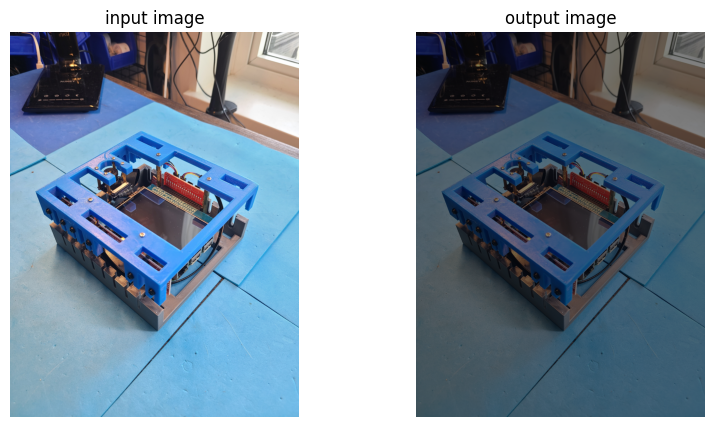

In [3]:
assert func.generate()[0]

In [4]:
# END